(activity16_solution)=

# Activity 16 Solution: Causal Trees

**2025-04-24**

---

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from econml.dml import CausalForestDML
from econml.cate_interpreter import SingleTreeCateInterpreter

Run the cell below to load in the data. We have the following variables:

- `age`: age of the customer
- `income`: income of the customer, in $100k 
- `has_membership`: whether the customer has a membership to the online music platform
- `avg_hours`: average number of hours per week the customer has spent on the platform
- `demand`: outcome variable -- sales of songs on the platform
- `T`: treatment (1 if the customer was given a discount, 0 otherwise)


In [69]:
customer_data = pd.read_csv('~/COMSC-341CD/data/customer_data.csv')
customer_data.head()

,age,income,has_membership,avg_hours,T,demand
0,53,0.960863,1,1.834234,0,3.917117
1,54,0.732487,0,7.171411,0,11.585706
2,33,1.130937,0,5.351920,0,24.675960
3,34,0.929197,0,6.723551,0,6.361776
4,30,0.533527,1,2.448247,1,12.624123


A more robust variant of causal tree prediction is to fit multiple trees and take the average of the predictions. This is known as the causal forest, and it just like a random forest model in machine learning. This is implemented in EconML as the [CausalForestDML](https://econml.azurewebsites.net/_autosummary/econml.dml.CausalForestDML.html) class. Initialize the model as follows:

```python
causal_forest = CausalForestDML(criterion='mse', # use mean squared error as the loss function
                                honest=True, # use honest sample splitting
                                discrete_treatment=True # treatment is binary
                                )
```

Then call `causal_forest.fit()` with the following arguments:

- `X`: the features given by `customer_data[covariates]`
- `T`: the treatment column given by `customer_data['T']`
- `Y`: the outcome column given by `customer_data['demand']`

The model may take ~1-2 minutes to fit.

In [70]:
covariates = ['age', 'income', 'has_membership', 'avg_hours']

# TODO initialize causal forest model
causal_forest = CausalForestDML(criterion='mse', # use mean squared error as the loss function
                                honest=True, # use honest sample splitting
                                discrete_treatment=True # treatment is binary
                                )

# TODO fit the model with the appropriate parameters
causal_forest.fit(X=customer_data[covariates],
                  T=customer_data['T'],
                  Y=customer_data['demand'])

You can then check the average treatment effect (ATE) via the  `causal_forest.ate_` attribute.

In [71]:
print("ATE: ", causal_forest.ate_)

ATE:  [1.56523164]


:::{admonition} Takeaway (click once you've completed the code)
:class: dropdown

The ATE estimate you should get is around 1.35, which can be interpreted as: on average, giving a discount to a customer increases the number of songs purchased by 1.35.

:::


Next, we'll summarize the causal forest model into a single causal tree using the [SingleTreeCateInterpreter](https://econml.azurewebsites.net/_autosummary/econml.cate_interpreter.SingleTreeCateInterpreter.html) class. Initialize the interpreter with the parameter `max_depth=2`.

Then, call the `interpret()` method with the following arguments:

- `cate_estimator`: our fitted causal forest model
- `X`: the features given by `customer_data[covariates]`





In [72]:
# TODO initialize the causal tree interpreter
cate_tree = SingleTreeCateInterpreter(max_depth=2)

# TODO fit the interpreter with the causal forest model
cate_tree.interpret(causal_forest, X=customer_data[covariates])

Finally, uncomment and run the cell below to plot the causal tree. According to the tree, which subgroup of customers buys the most product after being given a discount?

**Your response**: [pollev.com/tliu](https://pollev.com/tliu)

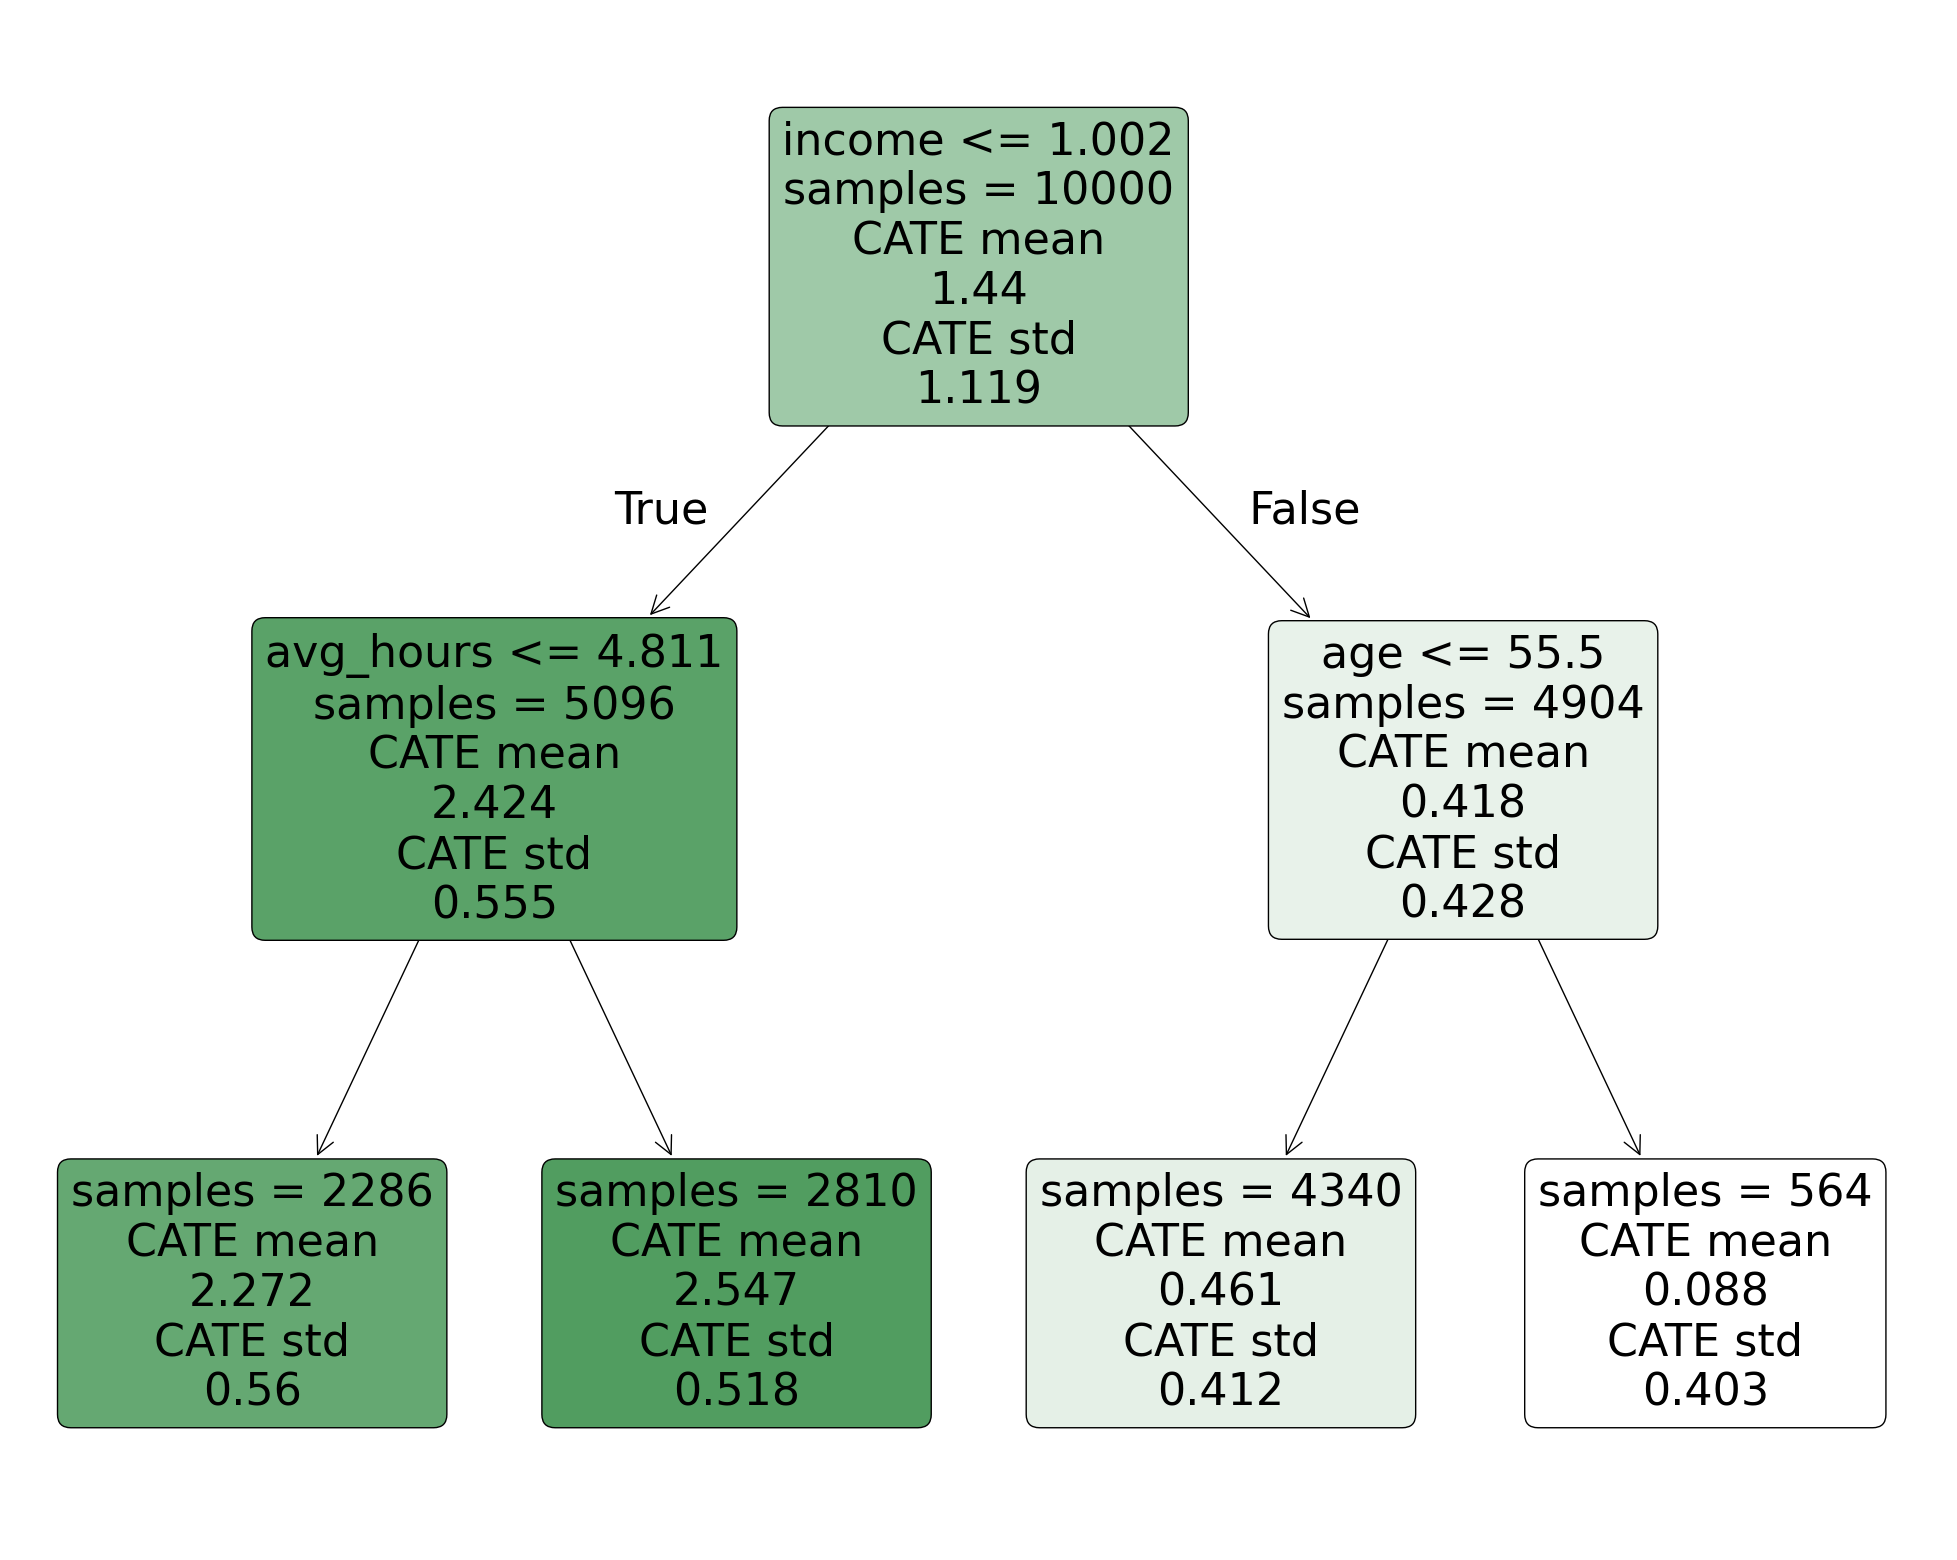

In [73]:
# resizes the plot to fit the causal tree
plt.figure(figsize=(25, 20))
cate_tree.plot(feature_names=covariates)

# Acknowledgements

This activity uses tutorial code and data provided by the [EconML package](https://econml.azurewebsites.net/index.html).